<a href="https://colab.research.google.com/github/abakm/AL-ML_Assignment-1/blob/master/Assignment3Classificaition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [28]:
# Read dataset
df = pd.read_csv('./diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
# remove rows that has zero values in features and
df.dropna(inplace=True)
df = df[~(df[df.columns.drop('Outcome')] == 0).any(axis=1)]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
751,1,121,78,39,74,39.0,0.261,28,0
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [30]:
# drop duplicates
df.drop_duplicates(inplace=True)
df

<ipython-input-30-f1816f79589d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
751,1,121,78,39,74,39.0,0.261,28,0
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


### Case study on the dataset

In [31]:
# Dataset Shape (rows, columns)
df.shape

(336, 9)

In [32]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               336 non-null    int64  
 1   Glucose                   336 non-null    int64  
 2   BloodPressure             336 non-null    int64  
 3   SkinThickness             336 non-null    int64  
 4   Insulin                   336 non-null    int64  
 5   BMI                       336 non-null    float64
 6   DiabetesPedigreeFunction  336 non-null    float64
 7   Age                       336 non-null    int64  
 8   Outcome                   336 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 26.2 KB


In [33]:
# Statistical Summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,3.851190,122.279762,70.244048,28.663690,155.348214,32.297321,0.518702,31.836310,0.330357
std,3.148352,30.784649,12.363401,10.249863,118.777281,6.368558,0.327689,10.458446,0.471043
min,1.000000,56.000000,24.000000,7.000000,15.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,27.800000,0.268000,24.000000,0.000000
50%,3.000000,119.000000,70.000000,28.500000,125.500000,32.750000,0.446500,28.000000,0.000000
75%,6.000000,144.000000,78.000000,36.000000,190.000000,36.250000,0.688250,38.000000,1.000000
max,17.000000,197.000000,110.000000,52.000000,846.000000,57.300000,2.329000,81.000000,1.000000


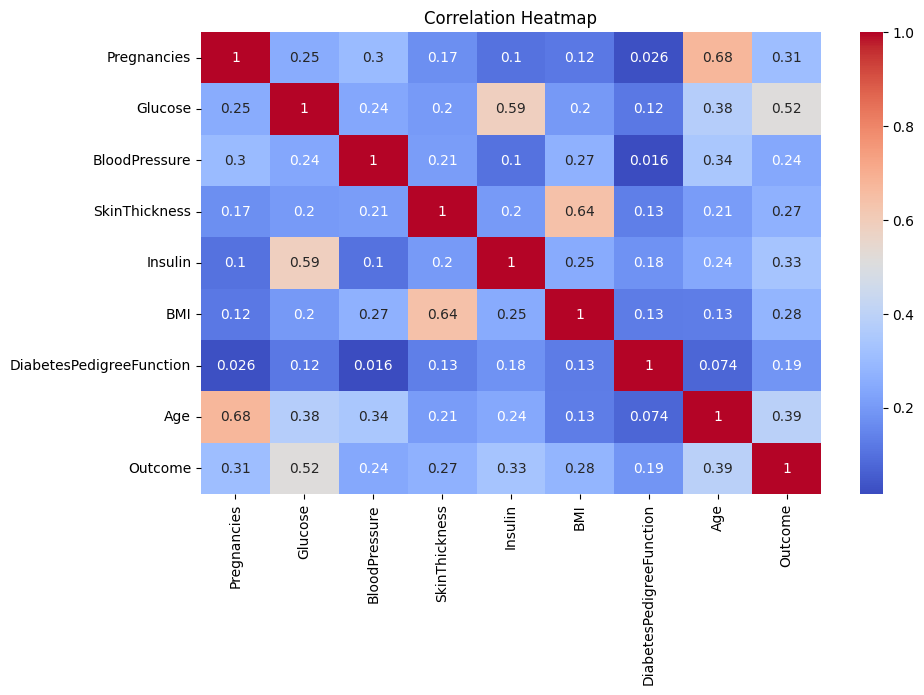

In [34]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#The heatmap visually confirms that diabetes is a multifactorial condition with several interrelated risk factors, with glucose level being particularly important for diagnosis and prediction.


-------------------------------------------------------------------------

In [35]:
# Train data
X = df[df.columns.drop('Outcome')]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Prediction based on Logistic Regression

In [36]:
# create Model
model = LogisticRegression(solver='liblinear', random_state=0)

In [37]:
# fit the model
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [38]:
# Predict the model
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

# Prediction based on K-Nearest Neighbor(KNN)

In [39]:
# create Model
knn = KNeighborsClassifier()

In [40]:
# fit the model  find the nerest distance between
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [41]:
# Predict the model
knn.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [45]:
# Accurancy score
accuracy_score(y_test, knn.predict(X_test))

0.7058823529411765

# Prediction based of Support Vector Machine(SVC)

In [46]:
# create model
svc = SVC()


In [47]:
# Train Model
svc.fit(X_train, y_train)


SVC()

In [48]:
# Predict
svc.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0])

In [ ]:
accuracy_score(y_test, svc.predict(X_test))

0.7352941176470589

### Prediction based on Decision Tree



In [50]:
# create model
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [51]:
# Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [52]:
# Predict the
dt.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0])

In [53]:
# Accuracy score
accuracy_score(y_test, dt.predict(X_test))

0.7352941176470589